<a href="https://colab.research.google.com/github/aldojda/BigData/blob/main/Practica_2_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2: Api DENUE INEGI

In [1]:
!pip install INEGIpy==1.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.1 MB/s eta 0:00:00


In [8]:
from INEGIpy import DENUE
denue = DENUE(token)

In [24]:
df1 = denue.Nombre(nombre = 'CADENA COMERCIAL OXXO SA DE CV', registro_inicial= 1, registro_final= 5000, as_geodf=False)
df2 = denue.Nombre(nombre = 'CADENA COMERCIAL OXXO SA DE CV', registro_inicial= 5001, registro_final= 10000, as_geodf=False)
df3 = denue.Nombre(nombre = 'CADENA COMERCIAL OXXO SA DE CV', registro_inicial= 10001, registro_final= 15000, as_geodf=False)
df4 = denue.Nombre(nombre = 'CADENA COMERCIAL OXXO SA DE CV', registro_inicial= 15001, registro_final= 20000, as_geodf=False)

In [34]:
import pandas as pd
df = pd.concat([df1, df2, df3, df4])
df.reset_index(inplace = True)
print(df.shape)

(17092, 23)


In [36]:
#LIMPIEZA DE DATOS
print(df.shape)
#eliminamos registros
df = df.drop_duplicates()
print(df.shape)

(17092, 23)
(17092, 23)


En total tenemos en México según el Denue un total de 17092 tiendas OXXO EN México

In [37]:
df.columns

Index(['index', 'CLEE', 'Id', 'Nombre', 'Razon_social', 'Clase_actividad',
       'Estrato', 'Tipo_vialidad', 'Calle', 'Num_Exterior', 'Num_Interior',
       'Colonia', 'CP', 'Ubicacion', 'Telefono', 'Correo_e', 'Sitio_internet',
       'Tipo', 'Longitud', 'Latitud', 'tipo_corredor_industrial',
       'nom_corredor_industrial', 'numero_local'],
      dtype='object')

In [80]:
df['estado'] = df.Ubicacion.str.split(",").apply(lambda x: x[2])
df['ciudad'] = df.Ubicacion.str.split(",").apply(lambda x: x[0])
df['ciudad1'] = df.Ubicacion.str.split(",").apply(lambda x: x[1])
df.tail(1)

,index,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,...,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,ciudad,estado,ciudad1
17087,2087,11037461110017042000000000U1,9357815,SUPER BARA,CADENA COMERCIAL OXXO SA DE CV,"Comercio al por menor en tiendas de abarrotes,...",6 a 10 personas,BOULEVARD,EMILIANO ZAPATA,,...,,Fijo,-101.42420688,20.95940276,,,,SILAO DE LA VICTORIA,GUANAJUATO,Silao de la Victoria
17088,2088,03008462112008301000000000U8,9343942,TIENDA OXXO ENSENADA,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor en minisupers,0 a 5 personas,CALLE,PALMA DE LOS ANDES,,...,,Fijo,-109.94083301,22.94157772,,,,CABO SAN LUCAS,BAJA CALIFORNIA SUR,Los Cabos
17089,2089,09011462112000892000000000U2,9358203,TIENDA OXXO SUCURSAL AGUSTIN REZA,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor en minisupers,6 a 10 personas,AVENIDA,TLAHUAC,6701,...,,Fijo,-99.02940745,19.29726001,,,,TLÁHUAC,CIUDAD DE MÉXICO,Tláhuac
17090,2090,03008461110023282000000000U6,9349986,TIENDAS OXXO,CADENA COMERCIAL OXXO SA DE CV,"Comercio al por menor en tiendas de abarrotes,...",6 a 10 personas,CALLE,PADRE NICOLAS TAMARAL,,...,,Fijo,-109.93799249,22.93906194,,,,CABO SAN LUCAS,BAJA CALIFORNIA SUR,Los Cabos
17091,2091,31050461213005571000000000U4,9366316,TIENDAS OXXO,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor de bebidas no alcohólica...,0 a 5 personas,CALLE,116,,...,,Fijo,-89.65483894,20.98227922,,,,MÉRIDA,YUCATÁN,Mérida


In [81]:
#Creamos columnas de estado y ciudad
df['estado'] = df.Ubicacion.str.split(",").apply(lambda x: x[2])
df['ciudad'] = df.Ubicacion.str.split(",").apply(lambda x: x[0])
df['ciudad1'] = df.Ubicacion.str.split(",").apply(lambda x: x[1])

<Axes: xlabel='estado'>

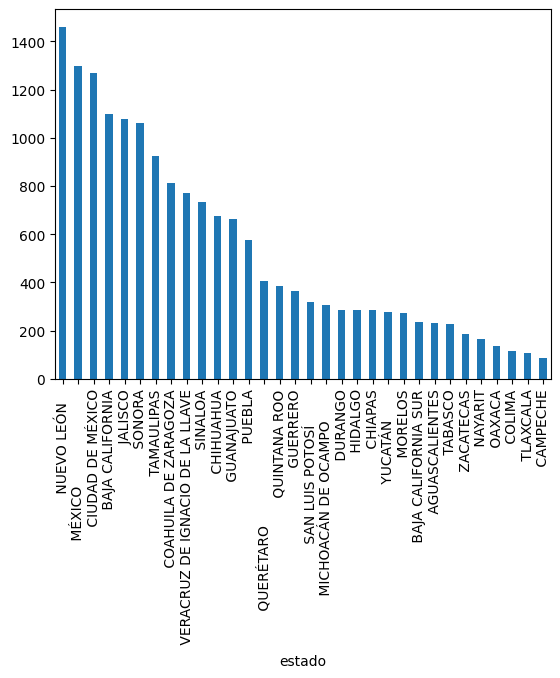

In [62]:
#estado con más Oxxos
df.groupby('estado').Id.count().sort_values(ascending = False)[:-1].plot(kind = "bar")

Como observamos en el gráfico anterior vemos que en Nuevo León tenemos más cantidad de Oxxos, en segundo lugar Estado de México seguido por Ciudad de Mexico

In [79]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(df,lat='Latitud',lon='Longitud', hover_name="Nombre")
fig.update_layout(
    title = 'Oxxos en Mexico', 
    title_x=0.5, 
    geo=dict( 
        center=dict( lon=-103.13851629, lat=23.44847385),
            scope='north america', 
            projection_scale=5
            )
    )
fig.show()

In [86]:
df.groupby("Estrato").Id.count().reset_index()

,Estrato,Id
0,0 a 5 personas,36
1,11 a 30 personas,1
2,251 y más personas,1
3,51 a 100 personas,1
4,6 a 10 personas,17053


Al revisar la columna de estrato vemos que esta clasificación está contenida en la etiqueta de 6 a 10 personas por lo que podemos asumir que esta variable contiene algunos datos mal clasificados o bien que tengan alguna particularidad

<Axes: xlabel='Tipo_vialidad'>

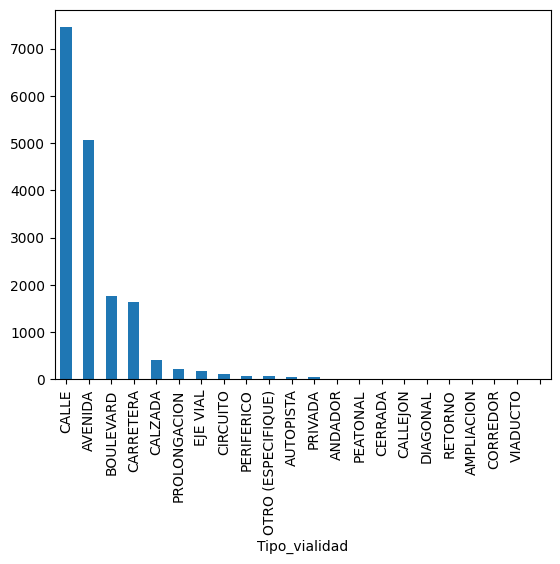

In [93]:
df.groupby("Tipo_vialidad").Id.count().sort_values(ascending = False).plot(kind = "bar")

In [112]:
df["tipo_corredor_industrial"].replace({'', "NA"}, inplace = True)
df.groupby("tipo_corredor_industrial").Id.count().sort_values(ascending = False).reset_index()

,tipo_corredor_industrial,Id
0,,16719
1,CENTRO Y PLAZA COMERCIAL,151
2,PARQUE INDUSTRIAL,94
3,OTRO CONGLOMERADO,39
4,ZONA INDUSTRIAL,32
5,CIUDAD INDUSTRIAL,22
6,CENTRAL DE ABASTO,9
7,EDIFICIO COMERCIAL Y DE SERVICIOS,9
8,PASAJE Y ANDADOR COMERCIAL,6
9,AEROPUERTO,4
